<a href="https://colab.research.google.com/github/KentFre/CDS_CardioVision/blob/datascience%2Fmachine_learning/04_heart_disease_predictive_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Predictive Analytics***

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np

from sklearn.model_selection import GridSearchCV
# Stratified train-test partitioning
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

# Models to be used
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# Metrics
import time
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
!pip install shap
import shap

## 1. Loading dataset

In [2]:
# Load the complete_case dataset that was already prepared for machine learning (Standardization, One-Hot-Encoding)
df = pd.read_csv('complete_case_machine_learning_data.csv')

In [3]:
# Display the first few rows
df.head()

,age,serum_cholesterol,max_heart_rate,st_depression,has_hypertension,cigarettes_per_day,years_smoking,resting_heart_rate,high_fasting_blood_sugar,exercise_induced_angina,...,gender_F,gender_M,cp_Asymptomatic,cp_Atypical_Angina,cp_Non_Anginal_Pain,cp_Typical_Angina,ecg_LVH,ecg_Normal,ecg_ST_Abnormality,Has_heart_disease
0,0.793589,0.056995,0.347747,1.073908,0.801969,1.718215,0.136405,-0.997063,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,False
1,1.240459,0.708878,-1.260182,0.365719,0.801969,1.177475,1.382461,-0.692052,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,True
2,1.240459,0.007796,-0.456218,1.339479,0.801969,0.095995,1.070947,0.375487,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,True
3,-2.111065,0.266089,1.764255,2.136192,-1.246932,-0.985485,-1.109650,0.833004,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,False
4,-1.664195,-0.299696,1.189995,0.277195,0.801969,-0.985485,-1.109650,-0.158282,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,False


In [4]:
# Change "Has_heart disease" to 0/1 instead of True/False, as it was excluded during clustering
df['Has_heart_disease'] = df['Has_heart_disease'].astype(int)

df.head()

,age,serum_cholesterol,max_heart_rate,st_depression,has_hypertension,cigarettes_per_day,years_smoking,resting_heart_rate,high_fasting_blood_sugar,exercise_induced_angina,...,gender_F,gender_M,cp_Asymptomatic,cp_Atypical_Angina,cp_Non_Anginal_Pain,cp_Typical_Angina,ecg_LVH,ecg_Normal,ecg_ST_Abnormality,Has_heart_disease
0,0.793589,0.056995,0.347747,1.073908,0.801969,1.718215,0.136405,-0.997063,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0
1,1.240459,0.708878,-1.260182,0.365719,0.801969,1.177475,1.382461,-0.692052,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1
2,1.240459,0.007796,-0.456218,1.339479,0.801969,0.095995,1.070947,0.375487,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1
3,-2.111065,0.266089,1.764255,2.136192,-1.246932,-0.985485,-1.109650,0.833004,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0
4,-1.664195,-0.299696,1.189995,0.277195,0.801969,-0.985485,-1.109650,-0.158282,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0




## 2. Data preparation for ML prediction


In [5]:
# Checking for missing values

missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 age                         0
serum_cholesterol           0
max_heart_rate              0
st_depression               0
has_hypertension            0
cigarettes_per_day          0
years_smoking               0
resting_heart_rate          0
high_fasting_blood_sugar    0
exercise_induced_angina     0
family_history_cad          0
gender_F                    0
gender_M                    0
cp_Asymptomatic             0
cp_Atypical_Angina          0
cp_Non_Anginal_Pain         0
cp_Typical_Angina           0
ecg_LVH                     0
ecg_Normal                  0
ecg_ST_Abnormality          0
Has_heart_disease           0
dtype: int64


As expected, there are no missing values in the dataset. This has been handled before.

Now, the df should be converted into a numpy array to be ready for the machine learning models.

### Check for dependencies between the features

In [6]:
# Convert to numpy array
data = df.copy()
data_numpy = data.to_numpy()

data_numpy

array([[ 0.79358897,  0.05699475,  0.34774655, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.24045884,  0.70887802, -1.26018245, ...,  1.        ,
         1.        ,  1.        ],
       [ 1.24045884,  0.00779601, -0.45621795, ...,  1.        ,
         1.        ,  1.        ],
       ...,
       [-0.21186822,  1.28696319,  0.50088265, ...,  0.        ,
         1.        ,  1.        ],
       [-0.10015076, -0.06600209, -1.56645464, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.6818715 ,  0.31528812, -1.83444281, ...,  1.        ,
         0.        ,  1.        ]])

### Split the data into Input Features and Target Value


In [7]:
# Data separation
data_X= data.drop(["Has_heart_disease"], axis = 1).values
data_y = data["Has_heart_disease"].values

print("Input features (X):")
print(data_X.shape)
print(data_X)

print("\nTarget class (y):")
print(data_y.shape)
print(data_y)

Input features (X):
(396, 20)
[[ 0.79358897  0.05699475  0.34774655 ...  1.          0.
   1.        ]
 [ 1.24045884  0.70887802 -1.26018245 ...  0.          1.
   1.        ]
 [ 1.24045884  0.00779601 -0.45621795 ...  0.          1.
   1.        ]
 ...
 [-0.21186822  1.28696319  0.50088265 ...  1.          0.
   1.        ]
 [-0.10015076 -0.06600209 -1.56645464 ...  1.          0.
   0.        ]
 [ 0.6818715   0.31528812 -1.83444281 ...  0.          1.
   0.        ]]

Target class (y):
(396,)
[0 1 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 1 1 0 0 0 1 1 1
 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 1 0 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 0
 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 1 0 1 1 1 1 1 1 0
 1 1 0 0 0 1 1 1 1 0 1 1 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 1 0 0 0
 0 0 0 1 1 1 1 1 1 0 1 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 1 0 0 1 1 0 1 0 0 1 1
 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0
 0 1 1 0 1 1 0 0 1 1 1 0 0 0 0 0 1 0 1 1 1 1 0 1 0

### Stratified Train-Test Partitioning

To ensure the correct distribution of patients with and without heart disease in both the training and test datasets, a stratified partitioning approach is applied. This method maintains the proportion of the target class (`Has_Heart_disease`) in each dataset.

The data is split with an 80/20 distribution, where 80% is used for training and 20% for testing. This split is chosen due to the relatively low number of available observations, maximizing the training data while retaining enough data for model evaluation.


In [8]:
RANDOM_SEED = 2500
np.random.seed(RANDOM_SEED)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(data_X,
                                                    data_y,
                                                    test_size=0.2,
                                                    stratify = data_y,
                                                    random_state=RANDOM_SEED)

# Print the shape of the data
print("=== TRAIN ===")
print(X_train.shape)
print(y_train.shape)
print("=== TEST ===")
print(X_test.shape)
print(y_test.shape)


=== TRAIN ===
(316, 20)
(316,)
=== TEST ===
(80, 20)
(80,)




##3. ML Models Evaluation

The `10 models` that will be looked into are:



*   Logistic Regression
*   Random Forest
*   XGBoost
*   K-Nearest Neighbours
*   Support Vector Machine (SVM)
*   Decision Trees
*   Naive Bayes
*   Gradient Boosting Classifier
*   AdaBoost
*   Extra Trees


For each model, hyperparameter tuning will be performed using `GridSearchCV`. If a model does not have hyperparameters to tune (e.g., Naive Bayes), the default parameters are used. The best estimator and its performance for each model are then displayed.



The `performance metrics` used to evaluate the models are:


*   Precision
*   Recall
*   F1-score
*   Accuracy
*   AUC_ROC score








In [10]:
!pip install tensorflow==2.12.0
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

def create_nn_model(input_dim):
    model = Sequential()
    model.add(Dense(128, activation='relu', input_dim=input_dim))
    model.add(Dropout(0.2))  # Add dropout for regularization
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


models = {
    'Logistic Regression': {
        'model': LogisticRegression(max_iter=1000),
        'params': {
            'C': [0.01, 0.1, 1, 10],
            'solver': ['lbfgs', 'liblinear']
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'n_estimators': [50, 100],
            'max_depth': [None, 5, 10],
            'min_samples_split': [2, 5]
        }
    },
    'XGBoost': {
        'model': XGBClassifier(eval_metric='logloss', random_state=42),
        'params': {
            'n_estimators': [50, 100],
            'max_depth': [3, 5],
            'learning_rate': [0.01, 0.1]
        }
    },
    'K-Nearest Neighbors': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7],
            'weights': ['uniform', 'distance']
        }
    },
    'Support Vector Machine': {
        'model': SVC(probability=True),
        'params': {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf'],
            'gamma': ['scale', 'auto']
        }
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(random_state=42),
        'params': {
            'max_depth': [None, 5, 10],
            'min_samples_split': [2, 5],
            'min_samples_leaf': [1, 2]
        }
    },
    'Naive Bayes': {
        'model': GaussianNB(),
        'params': {
            # GaussianNB doesn't have hyperparameters to tune
        }
    },
    'Gradient Boosting': {
        'model': GradientBoostingClassifier(random_state=42),
        'params': {
            'n_estimators': [50, 100],
            'learning_rate': [0.01, 0.1],
            'max_depth': [3, 5]
        }
    },
    'AdaBoost': {
        'model': AdaBoostClassifier(random_state=42),
        'params': {
            'n_estimators': [50, 100],
            'learning_rate': [0.01, 0.1, 1]
        }
    },
    'Extra Trees': {
        'model': ExtraTreesClassifier(random_state=42),
        'params': {
            'n_estimators': [50, 100],
            'max_depth': [None, 5, 10],
            'min_samples_split': [2, 5]
        }
    },
    'Neural Network': {
        'model': create_nn_model(X_train.shape[1]),  # Pass input dimension
        'params': {
            'epochs': [10, 20],  # Example hyperparameters to tune
            'batch_size': [32, 64]
        }
    }
}

In [11]:
# Dictionary to store the results
model_results = {}
best_estimators = {}

stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform hyperparameter tuning and evaluation for each model
for model_name, mp in models.items():
    print(f"\nTraining and tuning {model_name}...")
    model = mp['model']
    params = mp['params']

    if params and model_name != 'Neural Network':
        grid_search = GridSearchCV(estimator=model, param_grid=params, cv= stratified_kfold, scoring='accuracy', n_jobs=-1)
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_
        best_params = grid_search.best_params_
    elif model_name == 'Neural Network':
        # For neural network, use fit method instead of GridSearchCV
         from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
          # Wrap the create_nn_model function with KerasClassifier
         model = KerasClassifier(build_fn=create_nn_model, input_dim=X_train.shape[1], verbose=0)

        # Now you can use GridSearchCV with the wrapped model
         grid_search = GridSearchCV(estimator=model, param_grid=params, cv=stratified_kfold, scoring='accuracy', n_jobs=-1)
         grid_search.fit(X_train, y_train)
         best_model = grid_search.best_estimator_
         best_params = grid_search.best_params_
    else:
        # For models without hyperparameters to tune (e.g., Naive Bayes)
        best_model = model.fit(X_train, y_train)
        best_params = 'Default parameters'

    y_pred = best_model.predict(X_test)
    t_start = time.time()

    # Fit the best model (or re-fit if not using GridSearchCV)
    if model_name != 'Neural Network':  # Add this condition
        best_model.fit(X_train, y_train)  # Add this line
    else:
        best_model.fit(X_train, y_train, epochs=best_params['epochs'], batch_size=best_params['batch_size'], verbose=0)  # Add this line

    t_end = time.time()
    training_time = t_end - t_start
    t_start = time.time()
    y_predicted = grid_search.predict(X_test)
    t_end = time.time()
    prediction_time = t_end - t_start

    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)

    print(f"Best Parameters: {best_params}")
    print(f"{model_name} Accuracy: {accuracy:.4f}")
    print(f"{model_name} AUC-ROC: {auc:.4f}")
    print(f"Training Time: {training_time:.2f} seconds")
    print(f"Prediction Time: {prediction_time:.2f} seconds")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print(f"Best model: ", best_model)

    # Store results
    model_results[model_name] = accuracy
    best_estimators[model_name] = best_model



Training and tuning Logistic Regression...
Best Parameters: {'C': 0.1, 'solver': 'lbfgs'}
Logistic Regression Accuracy: 0.7750
Logistic Regression AUC-ROC: 0.7702
Training Time: 0.01 seconds
Prediction Time: 0.00 seconds
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.72      0.74        36
           1       0.78      0.82      0.80        44

    accuracy                           0.78        80
   macro avg       0.77      0.77      0.77        80
weighted avg       0.77      0.78      0.77        80

Best model:  LogisticRegression(C=0.1, max_iter=1000)

Training and tuning Random Forest...
Best Parameters: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 100}
Random Forest Accuracy: 0.7375
Random Forest AUC-ROC: 0.7285
Training Time: 0.42 seconds
Prediction Time: 0.01 seconds
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.64      0.69        36
    

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Best Parameters: {'learning_rate': 0.1, 'n_estimators': 50}
AdaBoost Accuracy: 0.7500
AdaBoost AUC-ROC: 0.7424
Training Time: 0.10 seconds
Prediction Time: 0.01 seconds
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.67      0.71        36
           1       0.75      0.82      0.78        44

    accuracy                           0.75        80
   macro avg       0.75      0.74      0.74        80
weighted avg       0.75      0.75      0.75        80

Best model:  AdaBoostClassifier(learning_rate=0.1, random_state=42)

Training and tuning Extra Trees...
Best Parameters: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 100}
Extra Trees Accuracy: 0.7250
Extra Trees AUC-ROC: 0.7197
Training Time: 0.10 seconds
Prediction Time: 0.01 seconds
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.67      0.69        36
           1       0.74      0.77      0.76      

<ipython-input-11-b54500199cf9>:22: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_nn_model, input_dim=X_train.shape[1], verbose=0)
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


3/3 [==============================] - 0s 4ms/step
Best Parameters: {'batch_size': 64, 'epochs': 10}
Neural Network Accuracy: 0.7875
Neural Network AUC-ROC: 0.7790
Training Time: 1.10 seconds
Prediction Time: 0.11 seconds
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.69      0.75        36
           1       0.78      0.86      0.82        44

    accuracy                           0.79        80
   macro avg       0.79      0.78      0.78        80
weighted avg       0.79      0.79      0.79        80

Best model:  <keras.wrappers.scikit_learn.KerasClassifier object at 0x79e4ad716d10>


*Compare model performance*


3/3 [==============================] - 0s 4ms/step


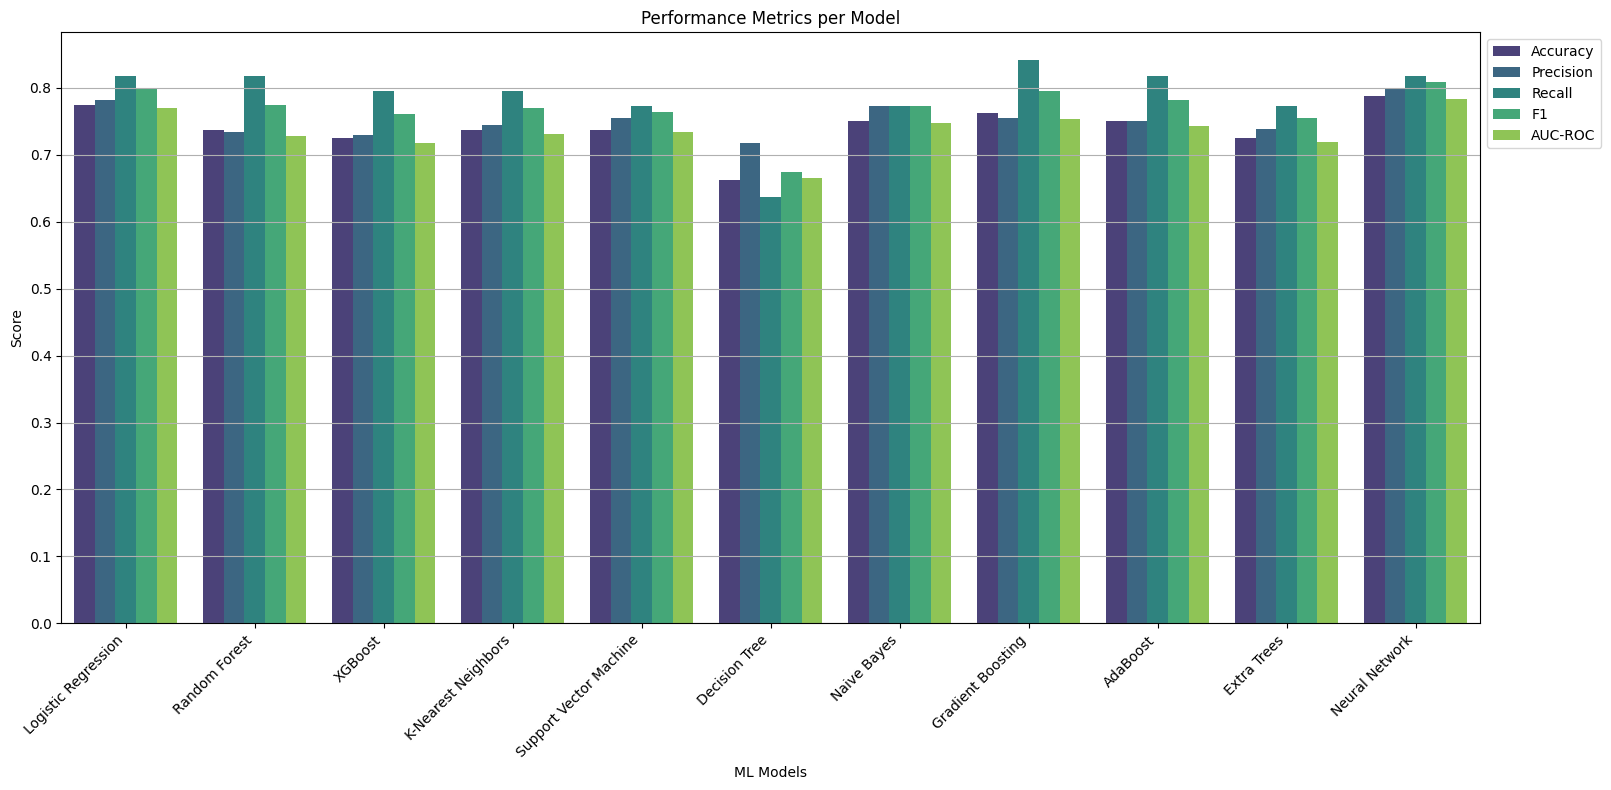

Performance Metrics per Model:
                     Model  Accuracy  Precision    Recall        F1   AUC-ROC
0      Logistic Regression    0.7750   0.782609  0.818182  0.800000  0.770202
1            Random Forest    0.7375   0.734694  0.818182  0.774194  0.728535
2                  XGBoost    0.7250   0.729167  0.795455  0.760870  0.717172
3      K-Nearest Neighbors    0.7375   0.744681  0.795455  0.769231  0.731061
4   Support Vector Machine    0.7375   0.755556  0.772727  0.764045  0.733586
5            Decision Tree    0.6625   0.717949  0.636364  0.674699  0.665404
6              Naive Bayes    0.7500   0.772727  0.772727  0.772727  0.747475
7        Gradient Boosting    0.7625   0.755102  0.840909  0.795699  0.753788
8                 AdaBoost    0.7500   0.750000  0.818182  0.782609  0.742424
9              Extra Trees    0.7250   0.739130  0.772727  0.755556  0.719697
10          Neural Network    0.7875   0.800000  0.818182  0.808989  0.784091


In [12]:
# Function to calculate performance metrics
def calculate_performance(model_name, y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_pred)
    return accuracy, precision, recall, f1, auc

# Initialize lists to store performance data
model_names = []
accuracies = []
precisions = []
recalls = []
f1s = []
aucs = []

# Calculate and store performance metrics for each model
for model_name, model in best_estimators.items():
    y_pred = model.predict(X_test)
    accuracy, precision, recall, f1, auc = calculate_performance(model_name, y_test, y_pred)

    model_names.append(model_name)
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1s.append(f1)
    aucs.append(auc)

# Create DataFrame from performance data
df_performance = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracies,
    'Precision': precisions,
    'Recall': recalls,
    'F1': f1s,
    'AUC-ROC': aucs,

})

# Melt the DataFrame to long format for plotting
df_melt = pd.melt(df_performance, id_vars=['Model'], var_name='Metric', value_name='Score')

# Plot all performance metrics using seaborn
plt.figure(figsize=(15, 8))
sns.barplot(x='Model', y='Score', hue='Metric', data=df_melt, palette='viridis')
plt.title("Performance Metrics per Model")
plt.xlabel("ML Models")
plt.ylabel("Score")
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.legend(bbox_to_anchor=(1, 1))
plt.grid(axis="y")
plt.show()

print("Performance Metrics per Model:")
print(df_performance)


Among the 10 models, the best model from above evaluation is `Neural Network`:
* Accuracy: 0.7875
* AUC-ROC: 0.7841
* Training Time: 1.10 seconds
* Prediction Time: 0.11 seconds




## 4. Export best ML model with `pickle`



In [13]:
import os
import pickle

best_model_name = max(model_results, key=model_results.get)
best_model = best_estimators[best_model_name]

# Define the save path
save_path = "../visualization/models/risk_prediction_model.pkl"

os.makedirs(os.path.dirname(save_path), exist_ok=True)


# Save the best model using pickle
with open(save_path, 'wb') as file:
    pickle.dump(best_model, file)

print(f"Best model ({best_model_name}) saved to best_model.pkl")

Best model (Neural Network) saved to best_model.pkl
